In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('Processed_data.csv')

In [ ]:
data.head()

,Unnamed: 0,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,...,pca_90,pca_91,pca_92,pca_93,pca_94,pca_95,pca_96,pca_97,pca_98,pca_99
0,0,3,0.000,72.0,72.000000,26.0,10.0,6,10.0,16,...,0.011294,-0.023450,0.009454,-0.007929,0.000032,-0.007039,-0.011485,0.015448,-0.012006,-0.003866
1,1,4,1.002,91.8,54.472104,48.0,10.0,22,18.4,6,...,0.039491,0.021280,-0.005106,-0.015760,0.016425,0.039872,-0.047719,-0.000016,-0.013681,-0.010934
2,2,1,0.000,91.0,91.000000,38.0,10.0,20,7.0,16,...,0.012038,0.099881,0.019001,0.063796,0.002496,0.006196,0.051213,-0.014346,-0.050256,-0.007663
3,3,4,1.500,77.0,77.000000,40.0,10.0,10,12.0,91,...,0.008458,-0.063279,-0.003959,-0.030436,-0.020446,-0.017096,-0.009632,0.055119,0.063940,0.017744
4,4,4,0.180,73.0,54.472104,26.0,10.0,10,15.0,91,...,-0.047187,0.015230,0.064401,0.005247,-0.016908,-0.042391,0.024430,-0.047003,0.015520,0.032127


In [ ]:
data.shape

(256574, 127)

In [ ]:
data.size

32584898

In [ ]:
data=data.drop(columns=['Unnamed: 0'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
X=data.drop(columns=['Severity'])
y=data['Severity']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [ ]:
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

# Decision Tree Model

In [ ]:
dt=DecisionTreeClassifier(
    criterion="entropy",
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

In [ ]:
y_dt_pred=dt.predict(X_test)
y_dt_train=dt.predict(X_train)

**Evaluation**

In [ ]:
print("Accuracy score of Test data:",accuracy_score(y_test,y_dt_pred)*100)
print("Accuracy score of Training data",accuracy_score(y_train,y_dt_train)*100)

Accuracy score of Test data: 83.65864305313046
Accuracy score of Training data 83.77280049888272


prints the classification report for the Decision Tree model on the test data.

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test,y_dt_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.86      0.87     15475
           2       0.75      0.79      0.77     16057
           3       0.80      0.80      0.80     16343
           4       0.93      0.90      0.91     16269

    accuracy                           0.84     64144
   macro avg       0.84      0.84      0.84     64144
weighted avg       0.84      0.84      0.84     64144



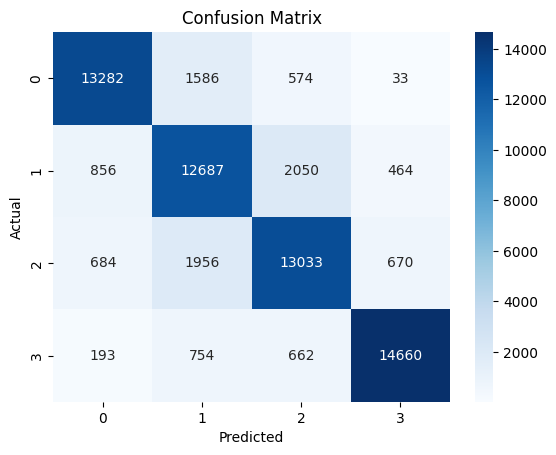

In [ ]:
cm_dt=confusion_matrix(y_test,y_dt_pred)
sns.heatmap(cm_dt,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.preprocessing import label_binarize

Calculate AUC for Decision Tree Model

In [ ]:
dt_pred_prob=dt.predict_proba(X_test)
dt_auc=roc_auc_score(y_test,dt_pred_prob,multi_class='ovr',average='weighted')
print("AUC:",dt_auc)

AUC: 0.9627721382722564


plots the ROC curve for the Decision Tree model for each class.

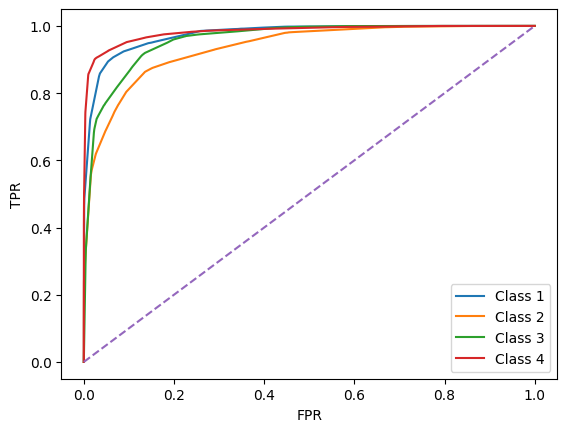

In [ ]:
y_test_bin = label_binarize(y_test, classes=[1,2,3,4])

for i in range(4):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], dt_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {i+1}")

plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

# Random Forest Model

In [ ]:
rf=RandomForestClassifier(
    n_estimators=400,
    max_depth=8,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features="sqrt",
    oob_score=True,
    random_state=42,
    n_jobs=-1
)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=400, n_jobs=-1, oob_score=True,
                       random_state=42)

In [ ]:
test_pred_rf=rf.predict(X_test)
train_pred_rf=rf.predict(X_train)

**Evaluation**

In [ ]:
print("Accuracy score of Testing",accuracy_score(y_test,test_pred_rf)*100)
print("Accuracy score of Training",accuracy_score(y_train,train_pred_rf)*100)

Accuracy score of Testing 86.29801696183587
Accuracy score of Training 86.75414436418438


 prints the classification report for the Random Forest model on the test data.

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test,test_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.91      0.90     15475
           2       0.82      0.79      0.81     16057
           3       0.81      0.86      0.83     16343
           4       0.94      0.89      0.92     16269

    accuracy                           0.86     64144
   macro avg       0.86      0.86      0.86     64144
weighted avg       0.86      0.86      0.86     64144



Text(50.722222222222214, 0.5, 'Actual')

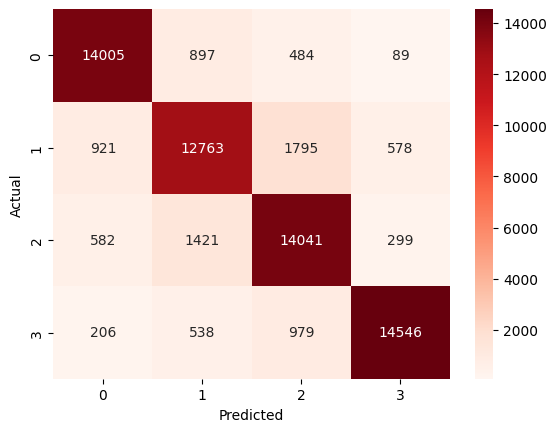

In [ ]:
cm_rf=confusion_matrix(y_test,test_pred_rf)
sns.heatmap(cm_rf,annot=True,fmt='d',cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Calculate AUC for Random Forest Model

In [ ]:
rf_pred_prob=rf.predict_proba(X_test)
rf_auc=roc_auc_score(y_test,rf_pred_prob,multi_class='ovr',average='weighted')
print("AUC:",rf_auc)

AUC: 0.9740007925105094



 plots the ROC curve for the Random Forest model for each class.





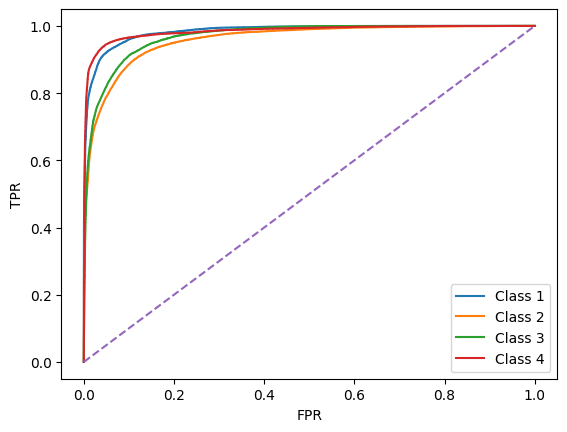

In [ ]:
y_test_bin = label_binarize(y_test, classes=[1,2,3,4])

for i in range(4):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], rf_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {i+1}")

plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()